# Intensität in Bildebene

Quelle: https://www2.ph.ed.ac.uk/~wjh/teaching/mo/slides/lens/lens.pdf

In [1]:
import numpy as np
from matplotlib import pyplot as pp

## Analytische Lösung

In [2]:
from scipy.special import j1

x = np.linspace(-15,15,2**10)
y = j1(x) / x

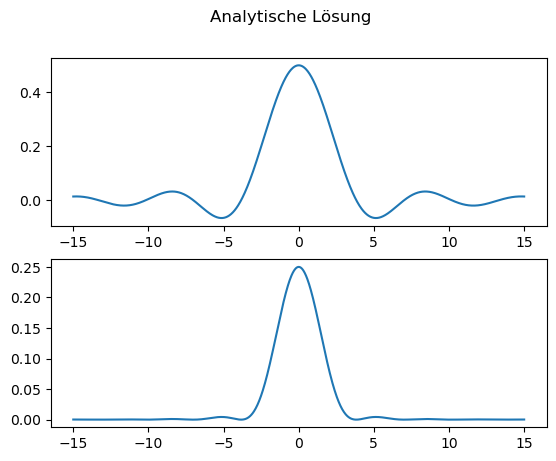

In [3]:
fig, axs = pp.subplots(2)
fig.suptitle('Analytische Lösung')
axs[0].plot(x, y)
axs[1].plot(x, y**2)
pp.show()

## Numerische Lösung

In [19]:
# Radius der Linse in xy-Ebene
r = 4

# Begrenzung der x und y Range
h = 5 


# Wellenlänge Licht 700nm (rot)
lmbda = 700 * 10**-9 

# Genauigkeit
N = 2**8

### Linsenparameter

In [20]:
# Brennweite der Linse
f = 10 

# Brechungsindex der Linse 
n = 4/3 

In [21]:
k = 2 * np.pi / lmbda
k

8975979.010256551

In [22]:
x_range = np.linspace(-h,h,N)
y_range = np.linspace(-h,h,N)


x, y = np.meshgrid(x_range, y_range)

### Filterfunktion 
Bereich für Integral

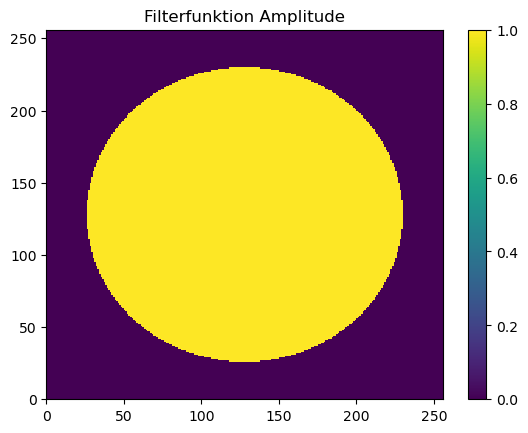

In [23]:
p_filter = np.where(x**2 + y**2 <= r**2,1,0)

pp.pcolormesh(p_filter)
pp.title('Filterfunktion Amplitude')
pp.colorbar()

In [24]:
s = x
t = y 

array([[ True, False, False, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False,  True]])

In [25]:
ds = (x_range[-1] - x_range[0]) / N 
dt = (y_range[-1] - y_range[0]) / N 

ds_dt = np.ones(x.shape) * ds * dt

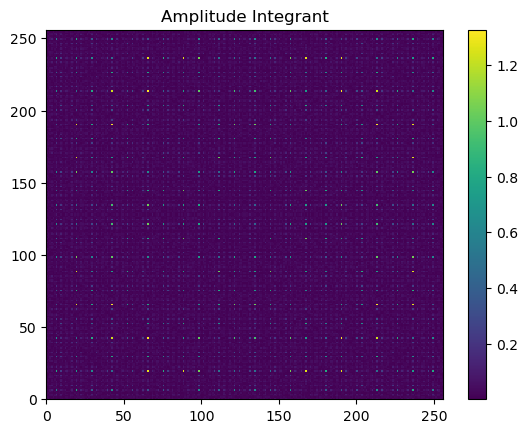

In [26]:
u2 = np.ones((N,N), dtype=complex)

for i in range (N):
    for j in range(N): 
        integrand = np.exp(-1j * k / f * ( x[i,j] * s + y[i,j] * t))
        u2[i,j] = np.sum(p_filter * integrand * ds_dt)

pp.pcolormesh(np.abs(u2))
pp.title('Amplitude Integrant')
pp.colorbar()

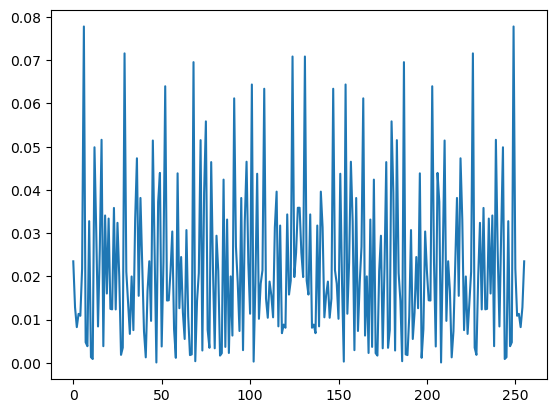

In [28]:
pp.plot(np.abs(u2)[N//2,])